In [40]:
import sys
sys.path.insert(1, '/home/thomas/research/projects/a549_40x/scripts/memes/')

import warnings
warnings.filterwarnings("ignore")

import glob
import pickle
from traj_class import single_cell_traj,fluor_single_cell_traj
import math
import matplotlib.pyplot as plt
import numpy as np
from os import listdir
from skimage.io import imread
from skimage.measure import regionprops
from skimage.filters.rank import otsu
from skimage.morphology import opening, area_closing, diameter_closing, closing, remove_small_holes, remove_small_objects,\
     local_maxima, h_maxima, disk, dilation,area_opening

In [15]:
sct_dir_name = 'sct-tlt_288'
sct_name = 'sub_XY2_179-01-13-22'


main_path='/home/thomas/research/projects/a549_40x/data/'
output_path=main_path+'out/pcna/01-13-22_72hr_no-treat/'
sct_path=output_path+'traj/'+sct_dir_name+'/'
sct_path=sct_path+sct_name

cell_seg_path = output_path+'XY2/seg/'
pcna_img_path = main_path+'ori/pcna/01-13-22_72hr_no-treat/XY2_C2/'
cell_seg_list = sorted(listdir(cell_seg_path))
pcna_img_list = sorted(listdir(pcna_img_path))

with open (sct_path, 'rb') as fp:
        sct = pickle.load(fp)
traj_seri = sct.traj_seri
sct_time = sct.traj_seri[:,0]
sct_mean_int = sct.traj_pcna_feature_values[0]

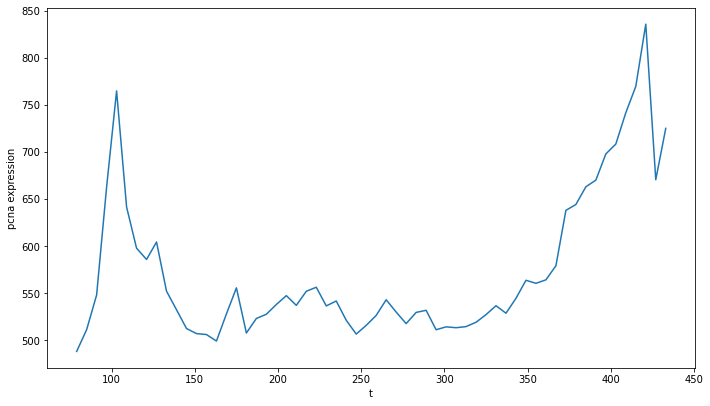

In [16]:


fig = plt.figure(figsize=(9,5))
ax = fig.add_axes([0,0,1,1])
ax.plot(sct_time,sct_mean_int)
ax.set_ylabel('pcna expression')
ax.set_xlabel('t')
plt.savefig('filename.jpg',bbox_inches='tight', dpi=150)
plt.show()

In [84]:
curr_traj_t_idx = 2
curr_t = traj_seri[curr_traj_t_idx][0]
curr_obj_num = traj_seri[curr_traj_t_idx][1]
print(curr_t,curr_obj_num)
fluor_img = imread(pcna_img_path + pcna_img_list[curr_t-1])
seg_img = imread(cell_seg_path + cell_seg_list[curr_t-1])

rps = regionprops(seg_img)
for r in rps:
    if r.label == curr_obj_num:
        crop_fluor_img = fluor_img[r.bbox[0]:r.bbox[2], r.bbox[1]:r.bbox[3]]
        cell_mask = (seg_img == curr_obj_num)
        cell_fluor_img = (fluor_img*cell_mask)[r.bbox[0]:r.bbox[2],r.bbox[1]:r.bbox[3]]

        nuc_mask=cell_fluor_img>otsu(cell_fluor_img,selem=disk(max(cell_fluor_img.shape)/2), mask=cell_fluor_img>0)
        nuc_mask=remove_small_objects(opening(nuc_mask),100)
        print(np.sum(nuc_mask))
        
        nuc_mask=closing(nuc_mask,disk(7))
        nuc_mask=opening(nuc_mask,disk(7))
        
        
        # nuc_mask=area_closing(nuc_mask,area_threshold=1,connectivity=2)
        print(np.sum(nuc_mask))
        # nuc_mask=diameter_closing(nuc_mask)
        nuc_mask=remove_small_holes(nuc_mask,100)
        

        nuc_fluor_img=(crop_fluor_img*nuc_mask)

        cell_mean_intensity = np.sum(cell_fluor_img) * 1.0 / r.area
        nuc_mean_intensity=np.sum(nuc_fluor_img)*1.0/np.sum(nuc_mask)
        print('nuc mean int: '+str(nuc_mean_intensity))

91 28
724
711
nuc mean int: 550.5850914205345


(61, 58)


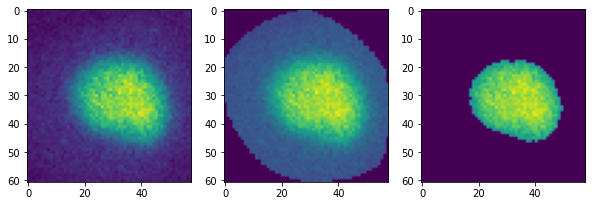

In [85]:
fig, axs = plt.subplots(1,3,figsize=(10, 7))
axs[0].imshow(crop_fluor_img)
axs[1].imshow(cell_fluor_img)
axs[2].imshow(nuc_fluor_img)
plt.savefig('filename.jpg',bbox_inches='tight', dpi=150)
print(nuc_mask.shape)

In [31]:
>>> w = 12
>>> x, y = np.mgrid[0:w,0:w]
>>> f = 180 + 0.2*((x - w/2)**2 + (y-w/2)**2)
>>> f[2:3,1:5] = 160; f[2:4,9:11] = 140; f[9:11,2:4] = 120
>>> f[9:10,9:11] = 100; f[10,10] = 100
>>> f = f.astype(int)

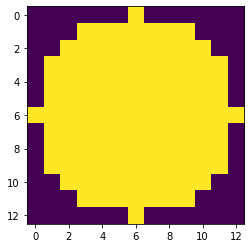

In [59]:
plt.imshow(disk(6))